In [1]:
import math
import os
import regex as re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Pre-processing

## EN

In [2]:
# read in useful parts of data
d_en = pd.read_csv('survey_data/en_complete.csv', skiprows=[1])
# d_en 

In [3]:
# replace strings "1 (I don’t refer to this container at all)" and "7 (I refer to this container every day)" with int 1 and 7
d_en = d_en.replace("1 (I don’t refer to this container at all)",1)
d_en = d_en.replace("7 (I refer to this container every day)",7)
# print(type(d_en.iloc[0,5])) # sanity check
d_en

,StartDate,EndDate,Q1,Q2,Q3,Q4,Q5,1_Q7,1_Q8,2_Q7,...,56_Q8,57_Q7,57_Q8,58_Q7,58_Q8,59_Q7,59_Q8,60_Q7,60_Q8,Q9
0,4/16/21 16:01,4/16/21 16:15,United States,No,Female,34,"In the photo, there is a room that appears to ...",2,Tub,1,...,Spray bottle,1,Container,2,Jug,2,Jug,2,Jug,NaN
1,4/16/21 15:51,4/16/21 16:15,United States,No,Female,57,I'm not sure if it is a sunroom or a foyer. It...,5,Small jar,1,...,Spray bottle,5,Jug,1,Jason g,1,Jug,6,Jug,I felt like I was calling different containers...
2,4/16/21 15:54,4/16/21 16:18,United States,No,Decline to answer,23,"A clean, open room, with high windows. Sconces...",1,tiny round container,1,...,squirt bottle,6,Detergent Bottle,1,Gas canister shaped container,1,big plastic container,6,gallon jug,NaN
3,4/16/21 15:59,4/16/21 16:23,United States,No,Female,28,The picture is of a room with lots of plants. ...,2,salve container,2,...,spray bottle,3,plastic jug,2,plastic jug,2,plastic bottle,2,plastic jug,It was frustrating not to be able to use what ...
4,4/16/21 16:07,4/16/21 16:34,United States,No,Male,18,I would tell them I saw a beautiful indoor roo...,2,container,2,...,Spray bottle,4,Detergent,1,Jug,3,Plastic jug,6,Jug,NaN
5,4/20/21 02:25,4/20/21 02:50,United States,No,Male,34,I see the inside of a building. It looks like ...,1,Wee small container,2,...,squeeze bottle,2,Big blue jug,2,Big container,1,Big tubby,4,Gallon carton,It seemed to go on for a long time and if we a...
6,4/20/21 02:25,4/20/21 02:51,United States,No,Male,24,"It's a fancy, upper-class sun room filled with...",2,Lip balm container,1,...,Spray bottle,4,Jug,1,Jug,1,Plastic bottle,5,Jug,A very long survey indeed. I feel like I don't...
7,4/20/21 02:44,4/20/21 02:59,United States,No,Male,20,The picture shows the inside of a building. Th...,4,thing,1,...,spray bottle,4,tub,4,jug,3,tub,4,jug,NaN
8,4/20/21 02:42,4/20/21 03:05,United States,No,Male,32,The image depicts the inside of a large room o...,3,canister,1,...,spray bottle,4,jug,4,jug,4,wide mouth jug,4,gallon jug,Not particularly.
9,4/20/21 03:47,4/20/21 04:05,United States,No,Male,23,"I would say i saw a antique looking house, may...",1,Dont know,1,...,Spray bottle,6,Laundry soap,2,Soy jug,4,Plastic jug,7,Plastic water jug,No


In [4]:
# participant row index for free description exclusion: 3, 10, 15, 16, 18 (the least native sounding), 23
# participant row index for too many non-sense naming answers: 5, 9, 22
d_en_excluded = d_en.drop([3, 10, 15, 16, 18, 23, 5, 9, 22], axis=0)
d_en_excluded

,StartDate,EndDate,Q1,Q2,Q3,Q4,Q5,1_Q7,1_Q8,2_Q7,...,56_Q8,57_Q7,57_Q8,58_Q7,58_Q8,59_Q7,59_Q8,60_Q7,60_Q8,Q9
0,4/16/21 16:01,4/16/21 16:15,United States,No,Female,34,"In the photo, there is a room that appears to ...",2,Tub,1,...,Spray bottle,1,Container,2,Jug,2,Jug,2,Jug,NaN
1,4/16/21 15:51,4/16/21 16:15,United States,No,Female,57,I'm not sure if it is a sunroom or a foyer. It...,5,Small jar,1,...,Spray bottle,5,Jug,1,Jason g,1,Jug,6,Jug,I felt like I was calling different containers...
2,4/16/21 15:54,4/16/21 16:18,United States,No,Decline to answer,23,"A clean, open room, with high windows. Sconces...",1,tiny round container,1,...,squirt bottle,6,Detergent Bottle,1,Gas canister shaped container,1,big plastic container,6,gallon jug,NaN
4,4/16/21 16:07,4/16/21 16:34,United States,No,Male,18,I would tell them I saw a beautiful indoor roo...,2,container,2,...,Spray bottle,4,Detergent,1,Jug,3,Plastic jug,6,Jug,NaN
6,4/20/21 02:25,4/20/21 02:51,United States,No,Male,24,"It's a fancy, upper-class sun room filled with...",2,Lip balm container,1,...,Spray bottle,4,Jug,1,Jug,1,Plastic bottle,5,Jug,A very long survey indeed. I feel like I don't...
7,4/20/21 02:44,4/20/21 02:59,United States,No,Male,20,The picture shows the inside of a building. Th...,4,thing,1,...,spray bottle,4,tub,4,jug,3,tub,4,jug,NaN
8,4/20/21 02:42,4/20/21 03:05,United States,No,Male,32,The image depicts the inside of a large room o...,3,canister,1,...,spray bottle,4,jug,4,jug,4,wide mouth jug,4,gallon jug,Not particularly.
11,4/23/21 03:04,4/23/21 03:40,United States,No,Female,36,The room is big and open with alot of air flow...,5,Carmex jar,5,...,Spray bottle,7,Jug,6,Jug,6,Jug,6,Jug,It seems pretty self explanatory I think. Hope...
12,4/23/21 03:19,4/23/21 03:42,United States,No,Male,18,There was a wonderful marble floor line brown ...,1,can,1,...,spray bottle,2,canister,1,cannister,1,jar,6,Carton,It is a bit repetitive and the question is a l...
13,4/23/21 03:20,4/23/21 03:43,United States,No,Female,35,I was in a opulent conservatory or green house...,1,Container,1,...,Spray bottle,5,Jug,1,Jug,1,Carton,7,Milk carton,None


### need prob

In [5]:
def extract_needprob(d):
    
    # subsetting d to get need_prob_rating df
    need_prob_rating = d.iloc[:,list(range(7,126,2))] # select relevant columns in d
    
    # clean up column names
    need_prob_rating.columns = list(range(1,60+1))
    
    # modify shape
    need_prob_rating = need_prob_rating.transpose().reset_index()
    need_prob_rating.columns = ["obj"] + need_prob_rating.columns[1:].tolist()
    
    # convert rating to float
    need_prob_rating.iloc[:, 1:] = need_prob_rating.iloc[:, 1:].astype(np.float16)
    
    # add mean frep column
    need_prob_rating['mean'] = need_prob_rating.iloc[:, 1:].mean(axis=1)
    
    # normalize mean freq
    total = sum(need_prob_rating['mean'])
    need_prob_rating['need_prob'] = need_prob_rating['mean'].apply(lambda x: x / total)
    
#     # add tranformed mean column (b=0.33)
#     need_prob_rating['transformed_mean'] = need_prob_rating['mean'].apply(lambda x: x ** (1/0.33))
    
#     # normalize tranformed mean
#     total = sum(need_prob_rating['transformed_mean'])
#     need_prob_rating['transformed_need_prob'] = need_prob_rating['transformed_mean'].apply(lambda x: x / total)
    
#     # add transformed mean midpoint column (b=0.67)
#     need_prob_rating['transformed_mean_mid'] = need_prob_rating['mean'].apply(lambda x: x ** (1/0.67))
    
#     # normalize tranformed mean midpoint
#     total = sum(need_prob_rating['transformed_mean_mid'])
#     need_prob_rating['transformed_need_prob_mid'] = need_prob_rating['transformed_mean_mid'].apply(lambda x: x / total)

    return need_prob_rating


In [6]:
# need_prob_rating_en = extract_needprob(d_en)
# need_prob_rating_en

In [7]:
need_prob_rating_en_excluded = extract_needprob(d_en_excluded)
need_prob_rating_en_excluded

,obj,0,1,2,4,6,7,8,11,12,13,14,17,19,20,21,24,mean,need_prob
0,1,2.0,5.0,1.0,2.0,2.0,4.0,3.0,5.0,1.0,1.0,7.0,1.0,3.0,1.0,1.0,1.0,2.5000,0.014089
1,2,1.0,1.0,1.0,2.0,1.0,1.0,1.0,5.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.3750,0.007749
2,3,3.0,4.0,5.0,2.0,2.0,2.0,3.0,4.0,2.0,7.0,7.0,2.0,1.0,1.0,1.0,1.0,2.9375,0.016555
3,4,3.0,4.0,4.0,2.0,2.0,3.0,5.0,6.0,1.0,2.0,7.0,4.0,1.0,1.0,1.0,5.0,3.1875,0.017964
4,5,3.0,5.0,5.0,5.0,2.0,3.0,5.0,6.0,1.0,2.0,7.0,4.0,1.0,1.0,3.0,6.0,3.6875,0.020782
5,6,2.0,4.0,7.0,2.0,3.0,5.0,6.0,5.0,1.0,7.0,1.0,3.0,2.0,1.0,1.0,3.0,3.3125,0.018669
6,7,2.0,3.0,2.0,4.0,3.0,1.0,7.0,4.0,1.0,5.0,7.0,4.0,1.0,1.0,2.0,5.0,3.2500,0.018316
7,8,2.0,4.0,2.0,2.0,2.0,3.0,4.0,6.0,2.0,2.0,7.0,3.0,2.0,1.0,1.0,2.0,2.8125,0.015851
8,9,1.0,6.0,6.0,2.0,2.0,5.0,7.0,5.0,2.0,7.0,7.0,2.0,5.0,1.0,1.0,3.0,3.8750,0.021839
9,10,2.0,6.0,6.0,2.0,2.0,1.0,7.0,6.0,1.0,2.0,7.0,3.0,5.0,1.0,1.0,1.0,3.3125,0.018669


In [8]:
def zipf_transfer(need_prob_d, rating_column_name, rank_column_name, freq_column_name):
    need_prob_d[rank_column_name] = need_prob_d[rating_column_name].rank(ascending = False, method='dense')  # in case of ties, rank always increases by 1 between groups. e.g., rank = 1, 2, 2, 3, 4, ..., instead of rank = 1, 2, 2, 4, 5, ...
    total = sum(1 / need_prob_d[rank_column_name])
    need_prob_d[freq_column_name] = (1 / need_prob_d[rank_column_name]) / total
    need_prob_d = need_prob_d.sort_values('obj')
    return need_prob_d

In [9]:
need_prob_rating_en_excluded = zipf_transfer(need_prob_rating_en_excluded, 'mean', 'rank', 'transformed_zipf')
need_prob_rating_en_excluded

,obj,0,1,2,4,6,7,8,11,12,...,14,17,19,20,21,24,mean,need_prob,rank,transformed_zipf
0,1,2.0,5.0,1.0,2.0,2.0,4.0,3.0,5.0,1.0,...,7.0,1.0,3.0,1.0,1.0,1.0,2.5000,0.014089,23.0,0.005630
1,2,1.0,1.0,1.0,2.0,1.0,1.0,1.0,5.0,1.0,...,1.0,2.0,1.0,1.0,1.0,1.0,1.3750,0.007749,32.0,0.004047
2,3,3.0,4.0,5.0,2.0,2.0,2.0,3.0,4.0,2.0,...,7.0,2.0,1.0,1.0,1.0,1.0,2.9375,0.016555,18.0,0.007194
3,4,3.0,4.0,4.0,2.0,2.0,3.0,5.0,6.0,1.0,...,7.0,4.0,1.0,1.0,1.0,5.0,3.1875,0.017964,14.0,0.009250
4,5,3.0,5.0,5.0,5.0,2.0,3.0,5.0,6.0,1.0,...,7.0,4.0,1.0,1.0,3.0,6.0,3.6875,0.020782,6.0,0.021583
5,6,2.0,4.0,7.0,2.0,3.0,5.0,6.0,5.0,1.0,...,1.0,3.0,2.0,1.0,1.0,3.0,3.3125,0.018669,12.0,0.010791
6,7,2.0,3.0,2.0,4.0,3.0,1.0,7.0,4.0,1.0,...,7.0,4.0,1.0,1.0,2.0,5.0,3.2500,0.018316,13.0,0.009961
7,8,2.0,4.0,2.0,2.0,2.0,3.0,4.0,6.0,2.0,...,7.0,3.0,2.0,1.0,1.0,2.0,2.8125,0.015851,20.0,0.006475
8,9,1.0,6.0,6.0,2.0,2.0,5.0,7.0,5.0,2.0,...,7.0,2.0,5.0,1.0,1.0,3.0,3.8750,0.021839,3.0,0.043166
9,10,2.0,6.0,6.0,2.0,2.0,1.0,7.0,6.0,1.0,...,7.0,3.0,5.0,1.0,1.0,1.0,3.3125,0.018669,12.0,0.010791


In [10]:
# %store need_prob_rating_en
%store need_prob_rating_en_excluded

Stored 'need_prob_rating_en_excluded' (DataFrame)


In [11]:
need_prob_rating_en_excluded.to_csv("survey_data/need_prob/need_prob_rating_en_excluded.csv")

### naming

In [12]:
def extract_naming(d):
    
    # subsetting d to get naming df
    naming = d.iloc[:,list(range(8,127,2))]
    
    # clean up column names
    naming.columns = list(range(1,60+1))
    
    # modify shape
    naming = naming.transpose().reset_index()
    naming.columns = ["obj"] + naming.columns[1:].tolist()
    
    return naming

In [13]:
# naming_survey_en = extract_naming(d_en)
# naming_survey_en

In [14]:
naming_survey_en_excluded = extract_naming(d_en_excluded)
naming_survey_en_excluded

,obj,0,1,2,4,6,7,8,11,12,13,14,17,19,20,21,24
0,1,Tub,Small jar,tiny round container,container,Lip balm container,thing,canister,Carmex jar,can,Container,glass container,tin,Balm,Glass jar,small container,jar
1,2,Canister,Canister,film canister,Container,Bottle,no clue,film canister,Container,jar,Canister,spool,film canister,Cap bottle,Plastic bottle,can,film container
2,3,Tincture,Bottle,tiny dropper bottle,Dropper,Dropper,vial,glass dropper bottle,Dropper,dropper,Dropper,glass dropper bottle,dropper bottle,Dropper,Glass jar,bottle,dropper bottle
3,4,Bottle,Bottle,small pill bottle,Pill container,Bottle,bottle,pill bottle,Bottle,bottle,Bottle,small plastic bottle,pill bottle,Pill bottle,Plastic bottle,bottle,prescription bottle
4,5,Bottle,Pill Bottle,small pill bottle,Pill bottle,Bottle,bottle,pill bottle,Bottle,jar,Bottle,small plastic bottle,pillbottle,Pill bottle,Plastic bottle,pills bottle,bottle
5,6,Container,Bottle,Small seasoning bottle,Small container,Bottle,thing,spice jar,Container,can,Bottle,tiny plastic container,shaker,Spice bottle,Small plastic container,container,spice jar
6,7,Jar,Jar,little jar,Jar,Jar,jar,jar,Jar,jar,Jar,small glass jar,jar,Jar,Glass jar,jar,jar
7,8,Bottle,Bottle,square bottle,container,Bottle,bottle,small bottle,Bottle,bottle,Bottle,small glass bottle,bottle,Medicine bottle,Small bottle,bottle,vial
8,9,Jar,Spice container,seasoning bottle,Spice bottle,Bottle,bottle,spice jar,Bottle,bottle,Bottle,small glass jar,bottle,Herb bottle,Plastic jar,bottle,spice bottle
9,10,Jar,Spice container,seasoning bottle,Jar,Bottle,jar,spice jar,Bottle,bottle,Jar,small glass container,jar,Herb jar,Glass bottle,bottle,bottle


In [15]:
naming_survey_en_excluded.transpose().to_csv("survey_data/naming/naming_survey_en_excluded.csv")

## CH

In [16]:
# read in useful parts of data
d_ch = pd.read_csv('survey_data/ch_complete.csv', skiprows=[1])
# d_ch

In [17]:
# replace strings "1 (我完全不提及这个容器)" and "7 (我每天都提及这个容器)" with int 1 and 7
d_ch = d_ch.replace("1 (我完全不提及这个容器)",1)
d_ch = d_ch.replace("7 (我每天都提及这个容器)",7)
# d_ch

In [18]:
# manual exclusion based on free description: none
# participant row index for too many non-sense naming answers: 16, 23
d_ch_excluded = d_ch.drop([16, 23], axis=0)
d_ch_excluded

,StartDate,EndDate,Q1,Q2,Q3,Q4,Q5,1_Q7,1_Q8,2_Q7,...,57_Q7,57_Q8,58_Q7,58_Q8,59_Q7,59_Q8,60_Q7,60_Q8,Q9,ID
0,4/28/21 22:45,4/28/21 23:03,中国大陆,否,女性,23,这个房间里有很多花，有各种各样的，粉色紫色和白色的花，还有一些没有开花的植物。这个房间的地面...,4,罐,2,...,2,桶,5,桶,3,瓶,4,桶,图片项目太多太多了！！！,950948
1,4/28/21 22:48,4/28/21 23:05,中国大陆,否,女性,23,哇，这里好多漂亮的花。这里太适合约会啦。\n请问这里是花园嘛？这里的主人一定很浪漫。这里的风...,4,小罐子,3,...,4,罐子,3,大罐子,4,大罐子,4,大罐子,NaN,951760
2,4/28/21 22:48,4/28/21 23:09,中国大陆,否,女性,23,这是一间花房，室外摆着黄色的郁金香，进门后正对着一个小的茶几，上面摆着一盆有粉色和紫色的花。...,2,盒,2,...,3,桶,2,桶,2,桶,2,桶,有,401801
3,4/28/21 22:49,4/28/21 23:09,中国大陆,否,女性,23,我看到一个好漂亮的房间，算是欧式建筑吧，门特别大，而且都是玻璃的，非常透亮。房间里有很多花，...,3,小罐,3,...,4,塑料瓶,5,桶,3,小瓶子,3,桶,有些容器不太认识，没有见过,775451
4,4/28/21 22:52,4/28/21 23:12,中国大陆,否,女性,24,这是一间非常具有欧式风情的花园洋房。房间里摆放着许许多多色彩斑斓的花朵，有粉色的郁金香，大概...,2,小盒子,1,...,2,手提壶,1,壶,1,塑料壶,1,壶,NaN,899981
5,4/28/21 22:53,4/28/21 23:12,中国大陆,否,女性,22,这是一所华丽的很大的房子，里面摆满了盆栽。地砖很好看，门窗也很好看，感觉很典雅。桌椅都是铁质...,2,小盒,1,...,1,桶,1,酱油壶,1,塑料罐,1,小桶,太长了太烦了,520919
6,4/28/21 22:52,4/28/21 23:13,中国大陆,否,女性,20,这是一个窗户明亮的房间，窗外阳光明媚，透过窗户照射进来，房间内放满了很多花盆，有郁金香、吊兰...,2,小罐子,2,...,2,提壶,3,提壶,2,壶,2,大提壶,太多日常生活中不会区分叫什么名字的容器，容易混淆,814912
7,4/28/21 22:57,4/28/21 23:16,中国大陆,否,女性,20,那里是一个大厅，里面摆了许多种类的花，非常的香。装修也非常的华美，墙壁上装有那种非常复古的灯...,4,小药膏盒,1,...,5,洗衣液瓶子,5,装醋的大瓶子,5,塑料罐,5,大水瓶,是的，实在是太多了，而且进度条在很长一段时间内不会动。不知道怎么形容的瓶子也很多emm,846523
8,4/28/21 22:49,4/28/21 23:18,中国大陆,否,女性,22,这是一个洋房，有许多种类的鲜花盛开着，包括郁金香等，还有一些铁质的桌子和椅子，大部分上面都摆...,3,小塑料罐,1,...,2,油桶,2,油桶,1,直形小油桶,3,桶,NaN,381753
9,4/28/21 22:55,4/28/21 23:23,中国大陆,否,女性,22,在一个典雅的花园风格大厅中，地面铺着黑框白底的瓷砖，四周有着绿框玻璃拱门，墙角挂着几盏华丽的...,2,小盒,5,...,1,桶,5,塑料桶,1,大瓶,5,桶,确实这些容器生活中不太会单独说它们的名字，感觉自己词汇很匮乏。感觉图片量有点大了。,683561


### need prob

In [19]:
# need_prob_rating_ch = extract_needprob(d_ch)
# need_prob_rating_ch

In [20]:
need_prob_rating_ch_excluded = extract_needprob(d_ch_excluded)
need_prob_rating_ch_excluded = zipf_transfer(need_prob_rating_ch_excluded, 'mean', 'rank', 'transformed_zipf')
need_prob_rating_ch_excluded

,obj,0,1,2,3,4,5,6,7,8,...,18,19,20,21,22,24,mean,need_prob,rank,transformed_zipf
0,1,4.0,4.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,...,4.0,1.0,2.0,1.0,6.0,1.0,2.564453,0.017703,10.0,0.012686
1,2,2.0,3.0,2.0,3.0,1.0,1.0,2.0,1.0,1.0,...,2.0,1.0,1.0,2.0,2.0,1.0,1.913086,0.013206,22.0,0.005766
2,3,2.0,3.0,1.0,3.0,1.0,2.0,3.0,5.0,1.0,...,4.0,2.0,4.0,2.0,2.0,2.0,2.564453,0.017703,10.0,0.012686
3,4,5.0,3.0,1.0,4.0,1.0,1.0,3.0,5.0,2.0,...,1.0,1.0,2.0,2.0,2.0,1.0,2.216797,0.015303,17.0,0.007462
4,5,2.0,3.0,2.0,2.0,2.0,1.0,3.0,2.0,3.0,...,3.0,1.0,6.0,2.0,7.0,2.0,2.738281,0.018903,6.0,0.021144
5,6,2.0,3.0,1.0,4.0,1.0,1.0,2.0,2.0,2.0,...,2.0,1.0,4.0,1.0,2.0,1.0,1.913086,0.013206,22.0,0.005766
6,7,2.0,3.0,2.0,4.0,1.0,2.0,2.0,5.0,3.0,...,1.0,1.0,4.0,2.0,1.0,1.0,2.304688,0.015909,15.0,0.008457
7,8,2.0,3.0,2.0,3.0,1.0,2.0,3.0,2.0,2.0,...,4.0,1.0,2.0,1.0,1.0,1.0,1.956055,0.013503,21.0,0.006041
8,9,2.0,4.0,2.0,2.0,2.0,1.0,3.0,2.0,2.0,...,1.0,2.0,3.0,1.0,1.0,4.0,2.173828,0.015006,18.0,0.007048
9,10,2.0,3.0,2.0,3.0,2.0,1.0,2.0,3.0,1.0,...,2.0,1.0,3.0,1.0,2.0,2.0,1.956055,0.013503,21.0,0.006041


In [21]:
# %store need_prob_rating_ch
%store need_prob_rating_ch_excluded

Stored 'need_prob_rating_ch_excluded' (DataFrame)


In [22]:
need_prob_rating_ch_excluded.to_csv("survey_data/need_prob/need_prob_rating_ch_excluded.csv")

### naming

In [23]:
# naming_survey_ch = extract_naming(d_ch)
# naming_survey_ch

In [24]:
naming_survey_ch_excluded = extract_naming(d_ch_excluded)
naming_survey_ch_excluded

,obj,0,1,2,3,4,5,6,7,8,...,13,14,15,17,18,19,20,21,22,24
0,1,罐,小罐子,盒,小罐,小盒子,小盒,小罐子,小药膏盒,小塑料罐,...,面霜瓶,小圆罐,润唇膏罐,麦当劳甜酸酱盒,面霜瓶,小容器,面霜小样瓶,药盒,小圆盒,盒
1,2,瓶,小瓶子,杯,塞子,庇阴罐,小盒,小药瓶,小瓶子,黑色桶状物,...,黑色小罐子,管,看不懂瓶,小小针线筒,药瓶,塑料小盒,墨水瓶,药瓶,胶卷桶,瓶子
2,3,瓶,小瓶子,滴瓶,有胶头滴管的瓶子,滴管瓶,滴管瓶,滴瓶,滴瓶,带吸管的棕色玻璃瓶,...,滴管玻璃瓶,滴管瓶,滴管,精华瓶,滴瓶,带吸管的小玻璃瓶,试剂瓶,小瓶,小滴瓶,药瓶
3,4,瓶,小瓶子,小瓶,罐,小瓶子,小药瓶,小瓶子,小药瓶,塑料小瓶,...,圆形小玻璃瓶,玻璃药瓶,药瓶,小胡椒罐,细颈瓶,小玻璃瓶,小型饮料瓶,小瓶,小药瓶,瓶子
4,5,瓶,小瓶子,瓶,塑料瓶,小药罐,小药瓶,小瓶子,小药瓶,小药罐,...,迷你小塑料罐,小瓶子,药瓶,维生素药瓶,药瓶,小药瓶,药片瓶,药瓶,药瓶,药瓶
5,6,罐,小罐子,盒,玻璃罐,小瓶子,罐,小瓶子,小药膏盒,塑料罐,...,红盖塑料瓶,小瓶子,小塑料圆罐,小小塑料盒,调料瓶,小塑料罐,凡士林瓶,小瓶,小瓶,瓶
6,7,瓶子,瓶子,瓶,玻璃罐,瓶,罐头瓶,小罐子,果酱瓶,玻璃罐,...,小玻璃瓶,小罐子,玻璃瓶,小小果酱瓶,罐头,玻璃罐,果酱罐子,小瓶,小玻璃瓶,瓶
7,8,瓶,小瓶子,瓶子,玻璃瓶,小药剂瓶,瓶,小瓶子,小药瓶,药瓶,...,方形小塑料瓶,小瓶子,药罐,小药水瓶,药瓶,小玻璃瓶,小瓶酒瓶,小瓶,小方塑料瓶,瓶子
8,9,瓶,胡椒瓶,小瓶,小玻璃瓶,调味瓶,小调料罐,小瓶子,装调料的罐子,料理瓶,...,玻璃胡椒罐,小罐子,调料罐,香料瓶,调料瓶,小瓶子,胡椒粉瓶,小玻璃瓶,小瓶,药瓶
9,10,瓶,小瓶子,玻璃瓶,小玻璃瓶,调味瓶,小调料瓶,小瓶子,玻璃瓶,锥形玻璃罐,...,玻璃胡椒瓶,小罐子,玻璃瓶,香料罐,调料瓶,小玻璃罐,饮料瓶,小瓶,小玻璃瓶,药瓶


In [25]:
naming_survey_ch_excluded.transpose().to_csv("survey_data/naming/naming_survey_ch_excluded.csv")

# Plotting

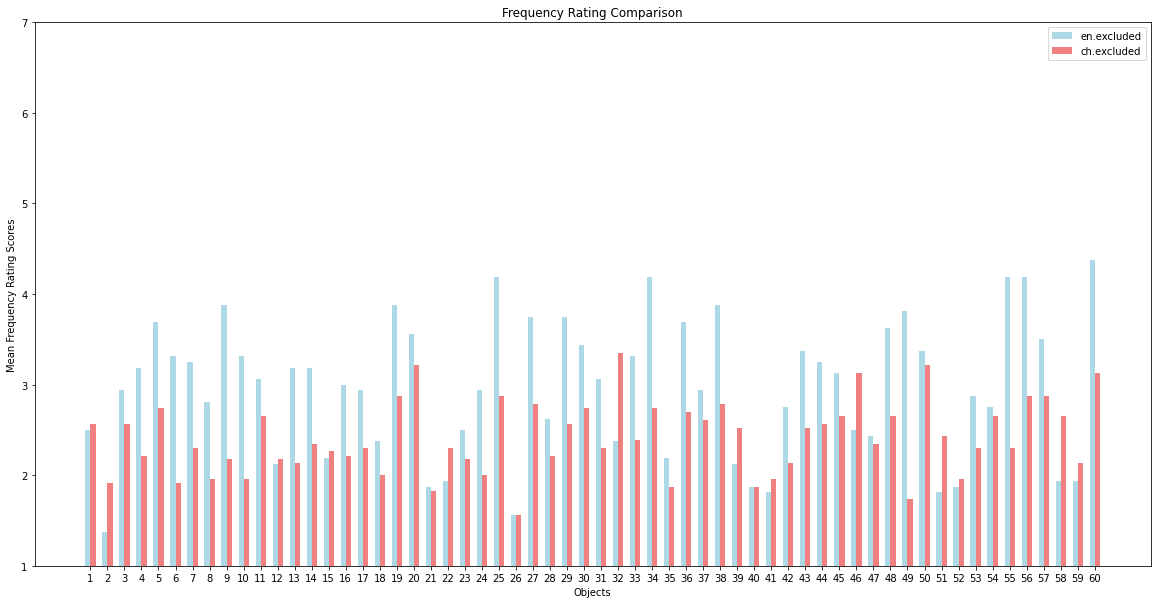

In [26]:

figure, axis = plt.subplots(figsize=(20, 10))

x = np.arange(1, 60+1)  # bar locations

width = 0.3
axis.bar(x - width/2, need_prob_rating_en_excluded["mean"], width, label="en.excluded", color="lightblue")
axis.bar(x + width/2, need_prob_rating_ch_excluded["mean"], width, label="ch.excluded", color="lightcoral")


axis.set_xticks(x)
axis.set_xlabel("Objects")
axis.set_ylabel("Mean Frequency Rating Scores")
axis.set_ylim([1,7])
axis.set_title("Frequency Rating Comparison")
axis.legend()


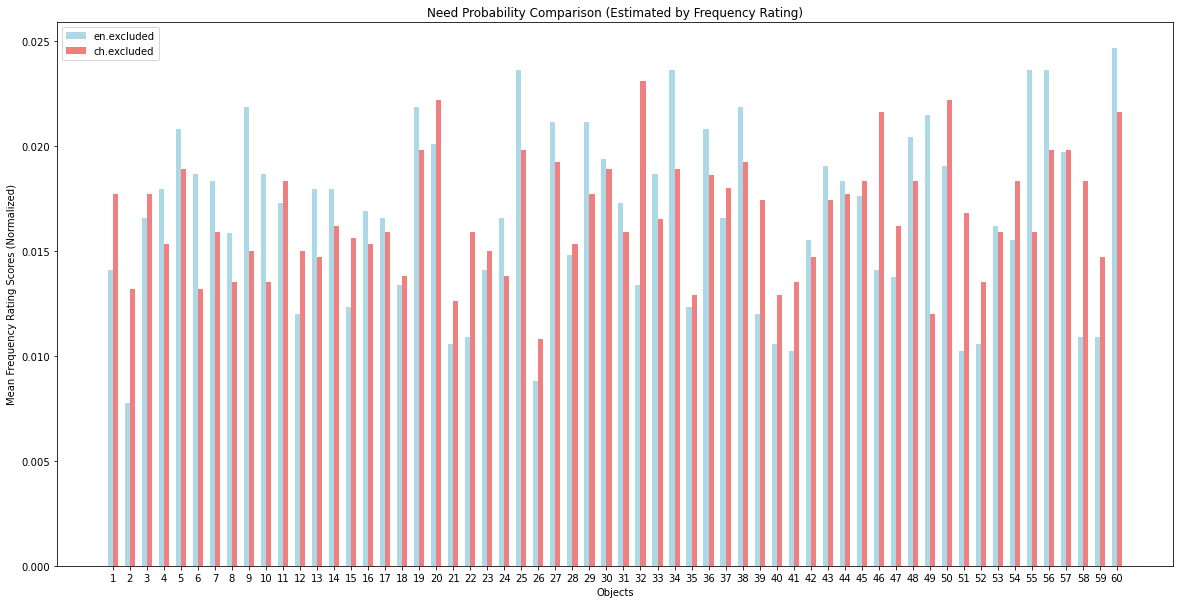

In [27]:

figure, axis = plt.subplots(figsize=(20, 10))

x = np.arange(1, 60+1)  # bar locations

width = 0.3
axis.bar(x - width/2, need_prob_rating_en_excluded["need_prob"], width, label="en.excluded", color="lightblue")
axis.bar(x + width/2, need_prob_rating_ch_excluded["need_prob"], width, label="ch.excluded", color="lightcoral")


axis.set_xticks(x)
axis.set_xlabel("Objects")
axis.set_ylabel("Mean Frequency Rating Scores (Normalized)")
# axis.set_ylim([1,7])
axis.set_title("Need Probability Comparison (Estimated by Frequency Rating)")
axis.legend()
